In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       10 non-null     float64
 1   Y       10 non-null     float64
dtypes: float64(2)
memory usage: 308.0 bytes


,count,mean,std,min,25%,50%,75%,max
X,10.0,5.04,2.701522,1.1,3.125,4.75,7.175,9.1
Y,10.0,13.53,30.636871,-5.0,2.275,5.10,7.175,100.0


In [4]:
df.isnull().sum()

X    1
Y    1
dtype: int64

In [5]:
df['X'].mean()
df['Y'].mean()

np.float64(13.529999999999998)

In [6]:
df = df.dropna()

In [7]:
df

,X,Y
0,1.1,1.5
1,2.0,1.7
3,3.8,4.0
4,4.5,4.1
5,5.0,100.0
6,6.2,6.1
8,7.5,7.4
9,8.3,-5.0
10,9.1,9.0


In [8]:
df.shape
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       9 non-null      float64
 1   Y       9 non-null      float64
dtypes: float64(2)
memory usage: 216.0 bytes


,count,mean,std,min,25%,50%,75%,max
X,9.0,5.277778,2.752171,1.1,3.8,5.0,7.5,9.1
Y,9.0,14.311111,32.389522,-5.0,1.7,4.1,7.4,100.0


<function matplotlib.pyplot.show(close=None, block=None)>

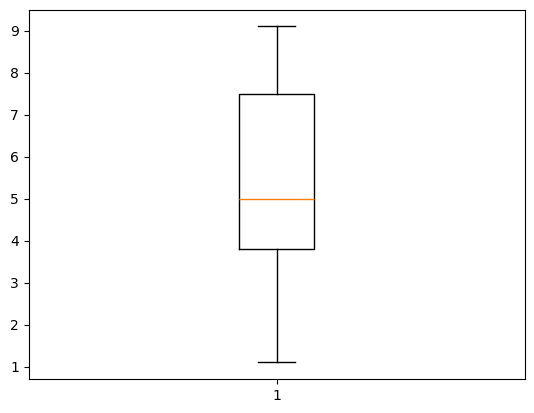

In [9]:
plt.boxplot(df['X'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

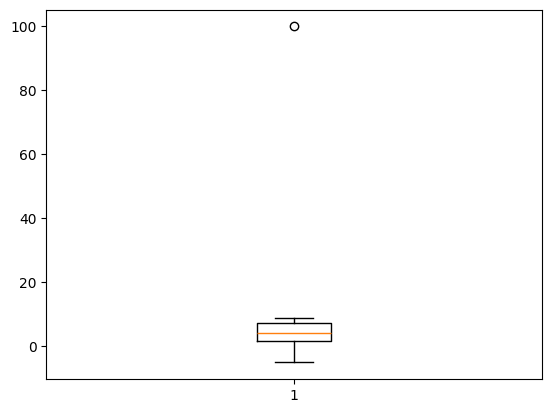

In [10]:
plt.boxplot(df['Y'])
plt.show

In [11]:
Q1 = df['Y'].quantile(0.25)
Q3 = df['Y'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
lower_bound
upper_bound

np.float64(15.950000000000001)

In [13]:
df = df[(df['Y'] >= lower_bound) & (df['Y'] <= upper_bound)]

<function matplotlib.pyplot.show(close=None, block=None)>

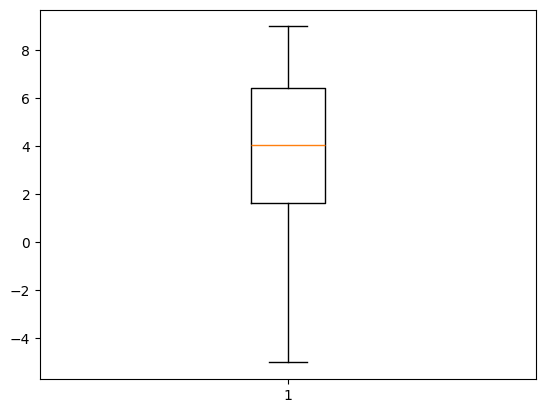

In [14]:
plt.boxplot(df['Y'])
plt.show

In [15]:
df = df[df["Y"] >= 0]

<function matplotlib.pyplot.show(close=None, block=None)>

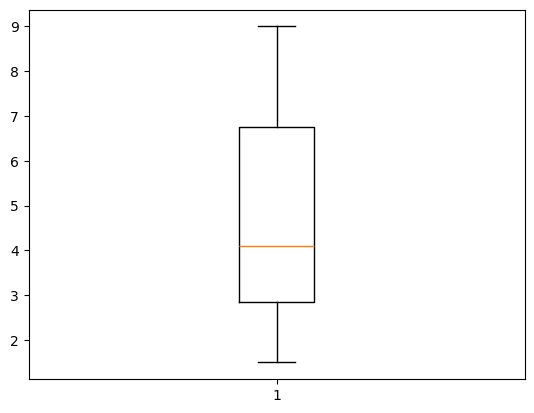

In [16]:
plt.boxplot(df['Y'])
plt.show

In [17]:
df

,X,Y
0,1.1,1.5
1,2.0,1.7
3,3.8,4.0
4,4.5,4.1
6,6.2,6.1
8,7.5,7.4
10,9.1,9.0


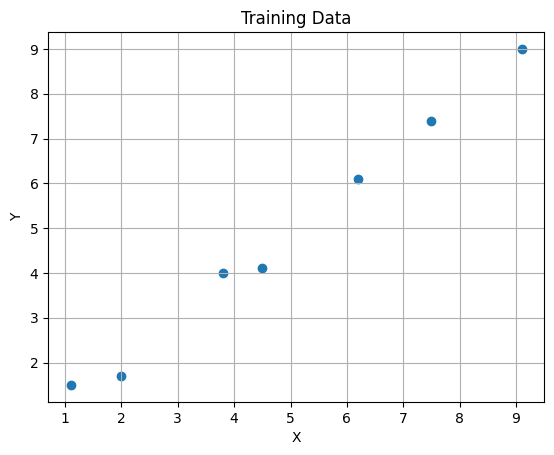

In [18]:
plt.scatter(df['X'], df['Y'])
plt.title("Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [19]:
# Normalize (MinMax Approach)

df["X_normal"] = (df["X"] - df["X"].min()) / (df["X"].max() - df["X"].min())
df["Y_normal"] = (df["Y"] - df["Y"].min()) / (df["Y"].max() - df["Y"].min())

print(df)

      X    Y  X_normal  Y_normal
0   1.1  1.5    0.0000  0.000000
1   2.0  1.7    0.1125  0.026667
3   3.8  4.0    0.3375  0.333333
4   4.5  4.1    0.4250  0.346667
6   6.2  6.1    0.6375  0.613333
8   7.5  7.4    0.8000  0.786667
10  9.1  9.0    1.0000  1.000000


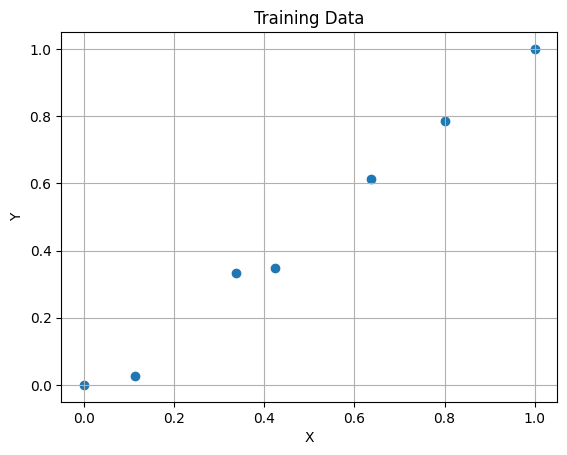

In [20]:
plt.scatter(df['X_normal'], df['Y_normal'])
plt.title("Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [21]:
df

,X,Y,X_normal,Y_normal
0,1.1,1.5,0.0000,0.000000
1,2.0,1.7,0.1125,0.026667
3,3.8,4.0,0.3375,0.333333
4,4.5,4.1,0.4250,0.346667
6,6.2,6.1,0.6375,0.613333
8,7.5,7.4,0.8000,0.786667
10,9.1,9.0,1.0000,1.000000


In [22]:

X = df["X_normal"].values
Y = df["Y_normal"].values

m = len(X)

In [23]:
def hypothesis_func(θ0, θ1, x):
    return (θ0 + (θ1 * x))

In [24]:
def mse_loss_func(θ0, θ1, X, Y):
    m = len(X)
    return (1 / (2 * m)) * np.sum((hypothesis_func(θ0, θ1, X) - Y) ** 2)

In [25]:
def mae_loss_func(θ0, θ1, X, Y):
    m = len(X)
    return (1 / m) * np.sum(np.abs(hypothesis_func(θ0, θ1, X) - Y))

In [26]:
def mse_gradient_descent(θ0, θ1, X, Y):
    m = len(X)
    diff_θ0 = (1 / m) * np.sum(hypothesis_func(θ0, θ1, X) - Y)
    diff_θ1 = (1 / m) * np.sum((hypothesis_func(θ0, θ1, X) - Y) * X)
    return diff_θ0, diff_θ1

In [27]:
def mae_gradient_descent(θ0, θ1, X, Y):
    m = len(X)
    diff_θ0 = (1 / m) * np.sum(np.sign(hypothesis_func(θ0, θ1, X) - Y))
    diff_θ1 = (1 / m) * np.sum(np.sign(hypothesis_func(θ0, θ1, X) - Y) * X)
    return diff_θ0, diff_θ1

In [28]:
def gradient_descent_function(X, Y, loss_func, gradient_func, α = 0.01, iterate = 5000):
    θ0 = 0.0
    θ1 = 0.0 

    loss_function_history = []

    for i in range(iterate):
        diff_θ0, diff_θ1 = gradient_func(θ0, θ1, X, Y)
        θ0 -= (α * diff_θ0)
        θ1 -= (α * diff_θ1)
        loss = loss_func(θ0, θ1, X, Y)
        loss_function_history.append(loss)
    
    return θ0, θ1, loss_function_history

In [29]:
θ0_mse, θ1_mse, loss_mse = gradient_descent_function(X, Y, mse_loss_func, mse_gradient_descent, α = 0.01, iterate = 5000)
θ0_mae, θ1_mae, loss_mae = gradient_descent_function(X, Y, mae_loss_func, mae_gradient_descent, α = 0.01, iterate = 5000)

print("MSE Final Parameters: θ0 =", θ0_mse, "θ1 =", θ1_mse)
print("MAE Final Parameters: θ0 =", θ0_mae, "θ1 =", θ1_mae)

MSE Final Parameters: θ0 = -0.04087064731972452 θ1 = 1.0251388917886948
MAE Final Parameters: θ0 = -0.0557142857142857 θ1 = 1.0560714285711779


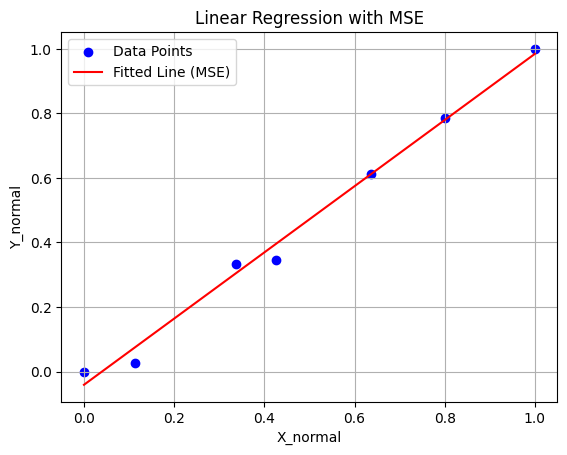

In [30]:
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, hypothesis_func(θ0_mse, θ1_mse, X), color="red", label="Fitted Line (MSE)")
plt.title("Linear Regression with MSE")
plt.xlabel("X_normal")
plt.ylabel("Y_normal")
plt.grid(True)
plt.legend()


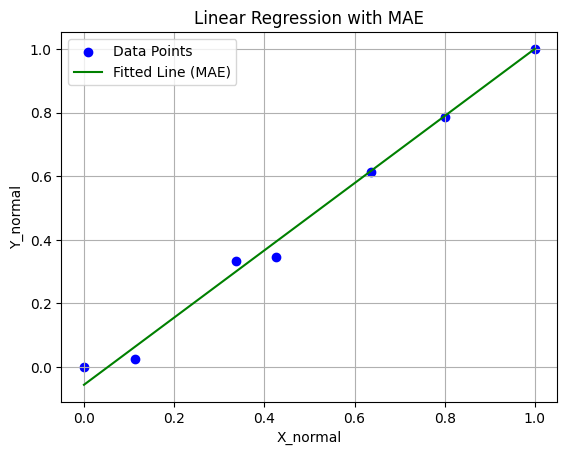

In [31]:
# Fitted Line (MAE)
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, hypothesis_func(θ0_mae, θ1_mae, X), color="green", label="Fitted Line (MAE)")
plt.title("Linear Regression with MAE")
plt.xlabel("X_normal")
plt.ylabel("Y_normal")
plt.grid(True)
plt.legend()
plt.show()

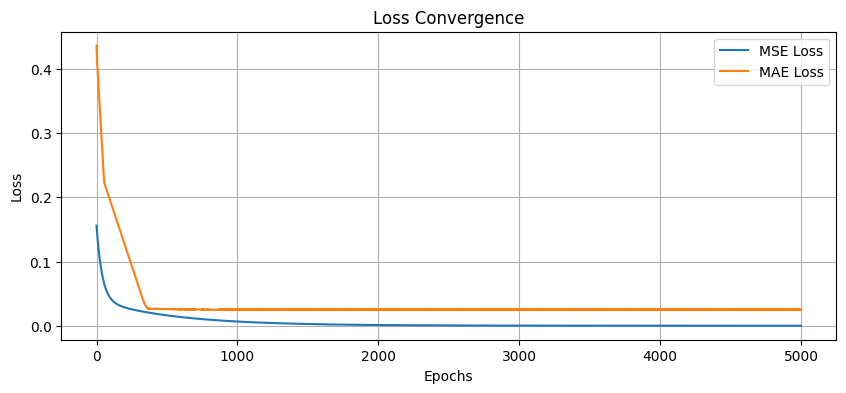

In [32]:
# Plot loss curves
plt.figure(figsize=(10, 4))
plt.plot(loss_mse, label="MSE Loss")
plt.plot(loss_mae, label="MAE Loss")
plt.title("Loss Convergence")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### If not remove null / outlier line will be almost straignt line

In [33]:
df_without_remove_null_outlier = pd.read_csv("data.csv")

In [34]:
df_without_remove_null_outlier["X_normal"] = (
    (df_without_remove_null_outlier["X"] - df_without_remove_null_outlier["X"].min())
    / (df_without_remove_null_outlier["X"].max() - df_without_remove_null_outlier["X"].min())
)

df_without_remove_null_outlier["Y_normal"] = (
    (df_without_remove_null_outlier["Y"] - df_without_remove_null_outlier["Y"].min())
    / (df_without_remove_null_outlier["Y"].max() - df_without_remove_null_outlier["Y"].min())
)

print(df_without_remove_null_outlier)



      X      Y  X_normal  Y_normal
0   1.1    1.5    0.0000  0.061905
1   2.0    1.7    0.1125  0.063810
2   2.9    NaN    0.2250       NaN
3   3.8    4.0    0.3375  0.085714
4   4.5    4.1    0.4250  0.086667
5   5.0  100.0    0.4875  1.000000
6   6.2    6.1    0.6375  0.105714
7   NaN    6.5       NaN  0.109524
8   7.5    7.4    0.8000  0.118095
9   8.3   -5.0    0.9000  0.000000
10  9.1    9.0    1.0000  0.133333


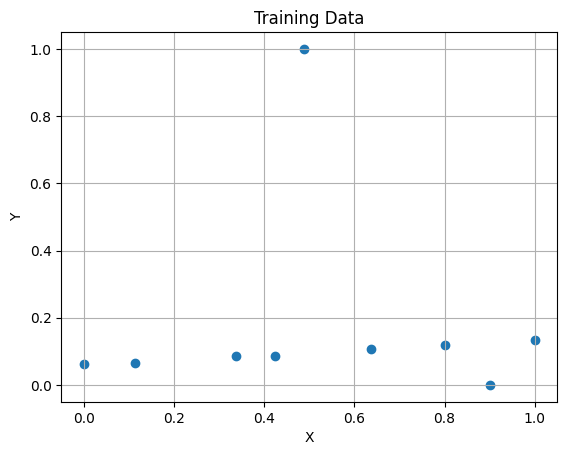

In [35]:
plt.scatter(df_without_remove_null_outlier['X_normal'], df_without_remove_null_outlier['Y_normal'])
plt.title("Training Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()